In [108]:
import numpy as np
import matplotlib.pyplot as plt
from matplotlib import animation
from matplotlib.animation import PillowWriter

The heat equation is:

### $\alpha \nabla^2 u = \frac{\partial u}{\partial t}$

where $u$ is temperature, $t$ is time, and $\alpha$ is the thermal diffusivity.

This can be generalised to 2D and discretized as:

### $\alpha \left( \frac{u_{i+1, j}^{(m)} - 2u_{i, j}^{(m)} + u_{i-1, j}^{(m)}}{\Delta x^2} + \frac{ u_{i, j+1}^{(m)} - 2u_{i, j}^{(m)} + u_{i, j-1}^{(m)} }{\Delta y^2}\right) = \frac{u_{i, j}^{(m+1)} - u_{i, j}^{(m)}}{\Delta t}$

where $m$ represents iterative time, and i, j are discrete x and y coordinates in space

can rearrange and solve for the next time snapshot, $u_j^{(m + 1)}$, taking $\Delta x$ = $\Delta y$...

### $u_{i, j}^{(m+1)} = u_{i, j}^{(m)} + \alpha \frac{\Delta t}{\Delta x^2} \left( u_{i+1, j}^{(m)} + u_{i-1, j}^{(m)} + u_{i, j+1}^{(m)} + u_{i, j-1}^{(m)} - 4u_{i, j}^{(m)} \right)$


In [10]:
edge = np.linspace(0, 1, 11)
print(edge)

# Create a meshgrid. xv tells you where that position is in the x direction, and the
# yv value tells you where you are in the y direction.

xv, yv = np.meshgrid(edge, edge)
print()
print('xv:')
print(xv)
print()
print('yv:')
print(yv)

[0.  0.1 0.2 0.3 0.4 0.5 0.6 0.7 0.8 0.9 1. ]

xv:
[[0.  0.1 0.2 0.3 0.4 0.5 0.6 0.7 0.8 0.9 1. ]
 [0.  0.1 0.2 0.3 0.4 0.5 0.6 0.7 0.8 0.9 1. ]
 [0.  0.1 0.2 0.3 0.4 0.5 0.6 0.7 0.8 0.9 1. ]
 [0.  0.1 0.2 0.3 0.4 0.5 0.6 0.7 0.8 0.9 1. ]
 [0.  0.1 0.2 0.3 0.4 0.5 0.6 0.7 0.8 0.9 1. ]
 [0.  0.1 0.2 0.3 0.4 0.5 0.6 0.7 0.8 0.9 1. ]
 [0.  0.1 0.2 0.3 0.4 0.5 0.6 0.7 0.8 0.9 1. ]
 [0.  0.1 0.2 0.3 0.4 0.5 0.6 0.7 0.8 0.9 1. ]
 [0.  0.1 0.2 0.3 0.4 0.5 0.6 0.7 0.8 0.9 1. ]
 [0.  0.1 0.2 0.3 0.4 0.5 0.6 0.7 0.8 0.9 1. ]
 [0.  0.1 0.2 0.3 0.4 0.5 0.6 0.7 0.8 0.9 1. ]]

yv:
[[0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0. ]
 [0.1 0.1 0.1 0.1 0.1 0.1 0.1 0.1 0.1 0.1 0.1]
 [0.2 0.2 0.2 0.2 0.2 0.2 0.2 0.2 0.2 0.2 0.2]
 [0.3 0.3 0.3 0.3 0.3 0.3 0.3 0.3 0.3 0.3 0.3]
 [0.4 0.4 0.4 0.4 0.4 0.4 0.4 0.4 0.4 0.4 0.4]
 [0.5 0.5 0.5 0.5 0.5 0.5 0.5 0.5 0.5 0.5 0.5]
 [0.6 0.6 0.6 0.6 0.6 0.6 0.6 0.6 0.6 0.6 0.6]
 [0.7 0.7 0.7 0.7 0.7 0.7 0.7 0.7 0.7 0.7 0.7]
 [0.8 0.8 0.8 0.8 0.8 0.8 0.8 0.8 0.8 0.8 0.8]
 [0

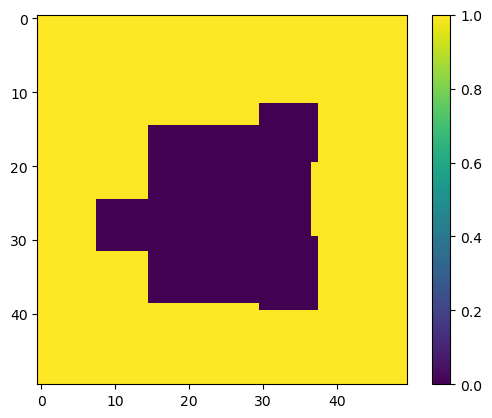

In [43]:
img = np.ones((50, 50))

img[15:39, 15:37] = 0
img[15:20, 37] = 0
img[30:40, 37] = 0
img[39, 30:37] = 0
img[12:15, 30:38] = 0
img[25:32, 8:15] = 0

plt.imshow(img)
plt.colorbar()

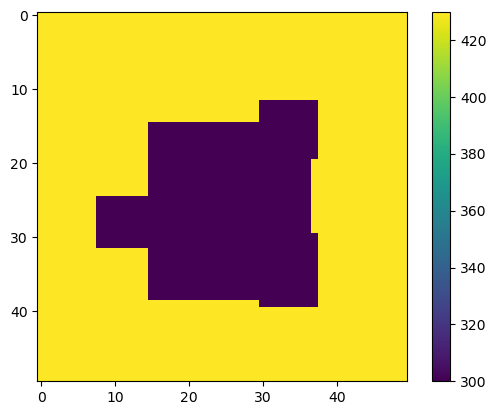

In [46]:
# Set the thermal diffusivity of the turkey
a = 1.32e-7

# Initial temperature of object and external (Kelvin)
object_temp = 300
external_temp = 430

initial_heat = np.ones((img.shape)) * external_temp
initial_heat[img == 0] = object_temp

plt.imshow(initial_heat)
plt.colorbar()

In [54]:
# Set up the real world dimensions

x = 0.5
dx = 0.5 / 100
dt = 1

# Set up the timing and snapshots
times = 10000 # 36000 seconds since dt = 1
snapshot_frequency = 10

snapshots = np.zeros([int(times / snapshot_frequency), img.shape[0], img.shape[1]])
snapshots[0] = initial_heat
print(snapshots.shape)

This simulation is only valid for:
### $\frac{\alpha \Delta t}{\Delta x^2} << \frac{1}{4}$

In [172]:
# Check that the iterations are valid.
check = a * dt / dx**2
print('VALID') if check < 1/4 else print('INVALID')
print(check)

VALID
0.005279999999999999


In [173]:
def heat(heatmap_frames: np.ndarray, object_bool_img: np.ndarray, times: int):
    map = heatmap_frames[0, :, :].copy()
    length = map.shape[0]
    frame = 1
    for time in range(1, times):
        state = map.copy()
        for i in range(1, length-1):
            for j in range(1, length-1):
                if not object_bool_img[j, i]:
                    state[j, i] = map[j, i] + a*dt / dx**2 * (map[j+1, i] + map[j-1, i] + map[j, i+1] + map[j, i-1] - 4*map[j, i])
        map = state.copy()
        if time % snapshot_frequency == 0:
            heatmap_frames[frame] = state
            frame += 1

In [156]:
print(snapshots.shape)

heat_frames = heat(
    heatmap_frames = snapshots,
    object_bool_img = img,
    times = times
)

(1000, 50, 50)


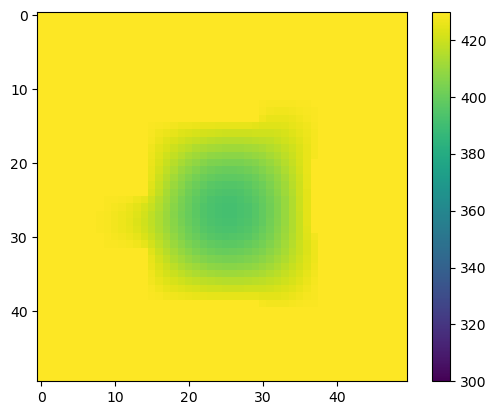

In [157]:
final_frame = snapshots[-1]
plt.imshow(final_frame, vmin=object_temp, vmax=external_temp)
plt.colorbar()

c:\Users\sylvi\anaconda3\lib\site-packages\matplotlib\animation.py:887: UserWarning: Animation was deleted without rendering anything. This is most likely not intended. To prevent deletion, assign the Animation to a variable, e.g. `anim`, that exists until you have outputted the Animation using `plt.show()` or `anim.save()`.
  warnings.warn(


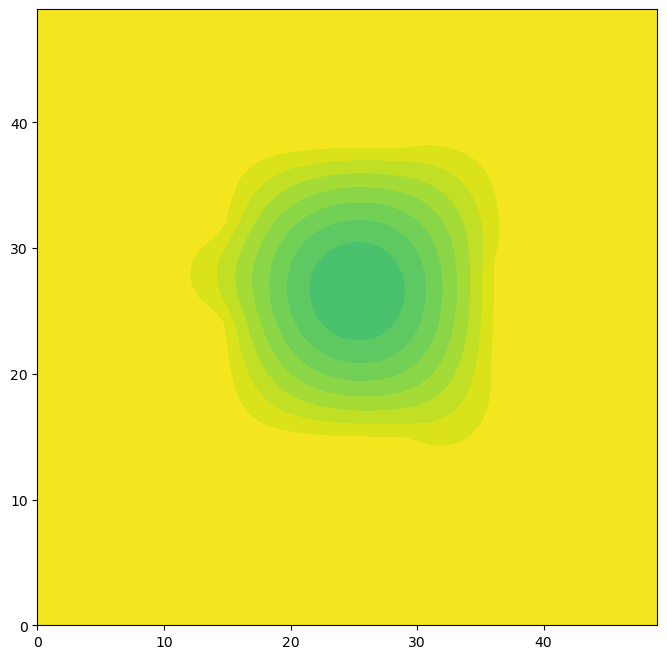

In [163]:
def animate(i):
    ax.clear()
    ax.contourf(snapshots[i*10], vmin=object_temp, vmax=external_temp)
    return fig

fig, ax = plt.subplots(figsize=(8, 8))
heat_animation = animation.FuncAnimation(fig, animate, frames=int(times / 100 - 1), interval = 50)
heat_animation.save('heating.gif', writer='pillow', fps=30)


Text(0.5, 0, 'time (seconds)')

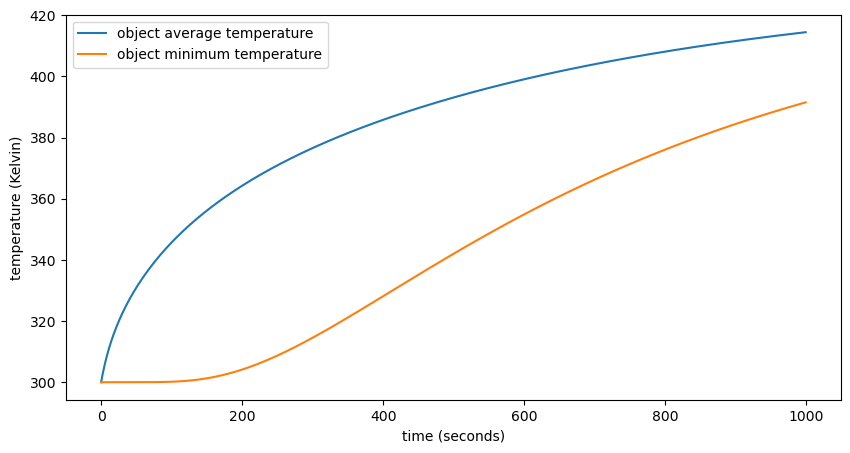

In [167]:
bool_img = img.astype(bool)
object_frame_mask = np.repeat(bool_img[np.newaxis, :, :], int(times / 10), axis=0)
object_temps = np.ma.masked_array(snapshots, mask=object_frame_mask)
avg_temps = np.mean(object_temps, axis=(1, 2))
min_temps = np.min(object_temps, axis=(1, 2))

fig, ax = plt.subplots(figsize=(10, 5))
plt.plot(avg_temps, label="object average temperature")
plt.plot(min_temps, label="object minimum temperature")
plt.ylabel('temperature (Kelvin)')
plt.legend()
plt.xlabel('time (seconds)')

### What if we add a small channel in the object?

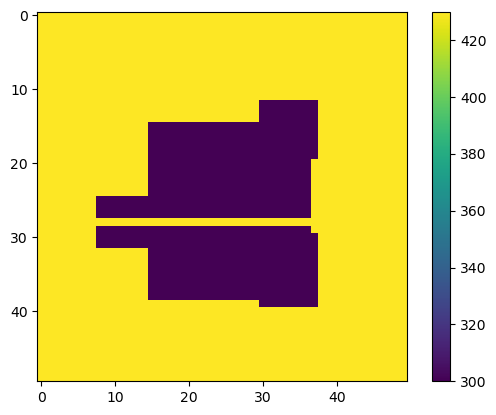

In [171]:
img = np.ones((50, 50))

img[15:39, 15:37] = 0
img[15:20, 37] = 0
img[30:40, 37] = 0
img[39, 30:37] = 0
img[12:15, 30:38] = 0
img[25:32, 8:15] = 0
img[28, :] = 1

# Set the thermal diffusivity of the turkey
a = 1.32e-7

# Initial temperature of object and external (Kelvin)
object_temp = 300
external_temp = 430

initial_heat = np.ones((img.shape)) * external_temp
initial_heat[img == 0] = object_temp

plt.imshow(initial_heat)
plt.colorbar()

In [175]:
# Set up the real world dimensions
x = 0.5
dx = 0.5 / 100
dt = 1

# Set up the timing and snapshots
times = 10000 # 36000 seconds since dt = 1
snapshot_frequency = 10

snapshots = np.zeros([int(times / snapshot_frequency), img.shape[0], img.shape[1]])
snapshots[0] = initial_heat
print(snapshots.shape)

(1000, 50, 50)


In [176]:
print(snapshots.shape)

heat_frames = heat(
    heatmap_frames = snapshots,
    object_bool_img = img,
    times = times
)

(1000, 50, 50)


c:\Users\sylvi\anaconda3\lib\site-packages\matplotlib\animation.py:887: UserWarning: Animation was deleted without rendering anything. This is most likely not intended. To prevent deletion, assign the Animation to a variable, e.g. `anim`, that exists until you have outputted the Animation using `plt.show()` or `anim.save()`.
  warnings.warn(


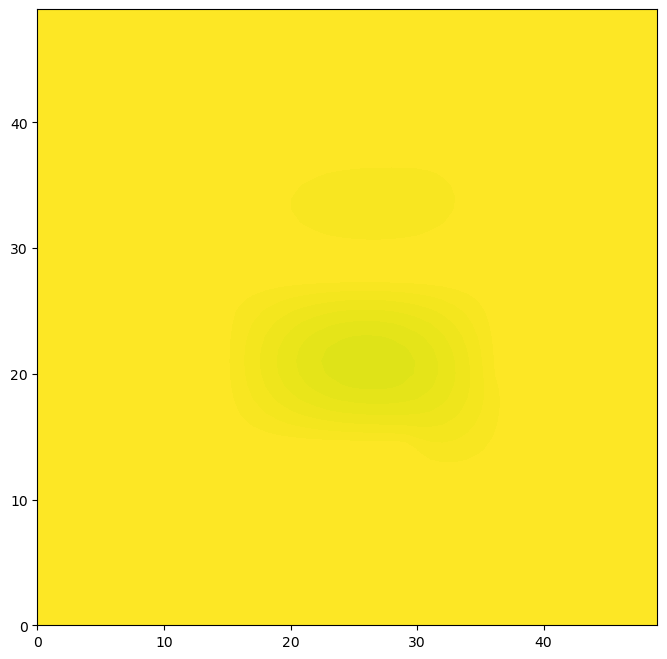

In [177]:
def animate(i):
    ax.clear()
    ax.contourf(snapshots[i*10], vmin=object_temp, vmax=external_temp)
    return fig

fig, ax = plt.subplots(figsize=(8, 8))
heat_animation = animation.FuncAnimation(fig, animate, frames=int(times / 100 - 1), interval = 50)
heat_animation.save('split_heating.gif', writer='pillow', fps=30)

Text(0.5, 0, 'time (seconds)')

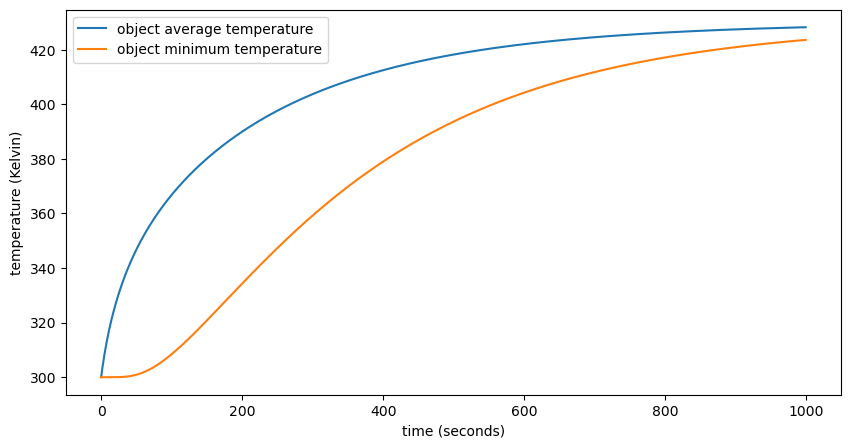

In [178]:
bool_img = img.astype(bool)
object_frame_mask = np.repeat(bool_img[np.newaxis, :, :], int(times / 10), axis=0)
object_temps = np.ma.masked_array(snapshots, mask=object_frame_mask)
avg_temps = np.mean(object_temps, axis=(1, 2))
min_temps = np.min(object_temps, axis=(1, 2))

fig, ax = plt.subplots(figsize=(10, 5))
plt.plot(avg_temps, label="object average temperature")
plt.plot(min_temps, label="object minimum temperature")
plt.ylabel('temperature (Kelvin)')
plt.legend()
plt.xlabel('time (seconds)')